# Imports

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import *
from stats import *

from iminuit import Minuit
from iminuit.cost import LeastSquares, ExtendedBinnedNLL

# Funcs

In [128]:
def V_sott(t, R, L, C, fase, V_o):
    '''tensione resistenza in regime sottosmorzato'''
    gamma = R/(2*L)
    omega = 1/np.sqrt(float(L*C))

    return R*C*V_o*np.exp(-gamma*t)*(gamma*np.cos(omega*t + fase) + omega*np.sin(omega*t + fase))

def V_crit(t, R, L,offset, Q_o):
    '''tensione resistenza in regime criticamente smorzato'''
    gamma = R/(2*L)
    
    return Q_o * R * (gamma**2) * (t+offset) * np.exp(-gamma*(t + offset))

def V_sovr(t, R, L, C, Q_o):
    '''tensione resistenza in regime sovrasmorzato'''
    gamma = R/(2*L)
    omega = 1/np.sqrt(float(L*C))
    betha = np.sqrt(np.power(gamma,2) - np.power(omega,2))
    
    return Q_o*R*(omega**2)*(np.exp(-t*(gamma-betha)) - np.exp(-t*(gamma+betha)))/(2*betha)

# RLC

In [171]:
R_L = 39.4
R_g = 50
C_val = 49e-9
L_int = 52.37e-3
L_int_err =  0.027e-3
C_int = 49.35e-9
C_int_err = 0.02e-9

chi = []

R = []
L = []
C = []
R_err = []
L_err = []
C_err = []

# R = 30 $\Omega$

87


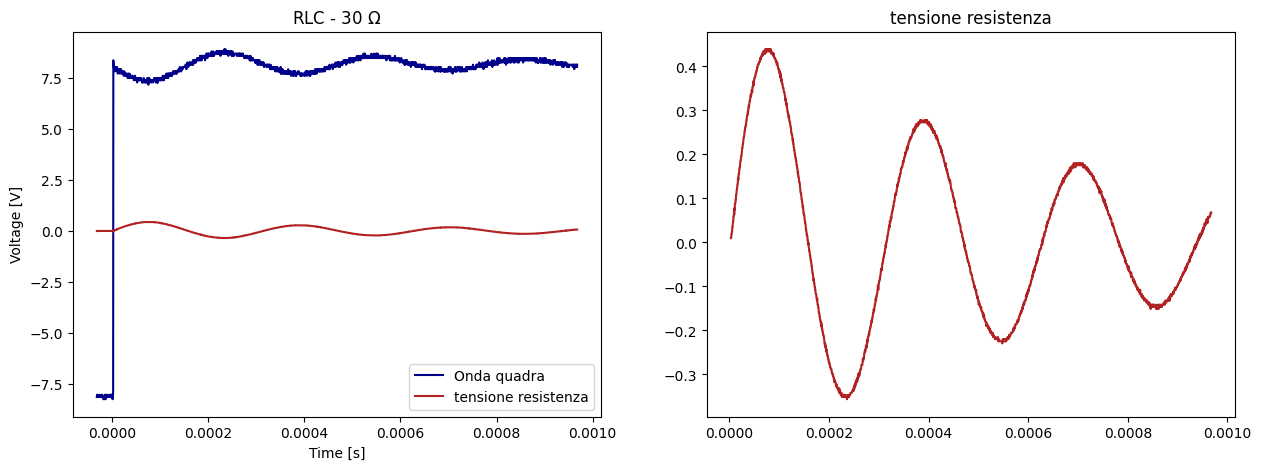

In [130]:
RLC_30_quadra, RLC_30_res, RLC_30_ind = get_data("data/RLC_30/")
if RLC_30_ind[1] == None:   RLC_30_ind = RLC_30_quadra[0], (RLC_30_quadra[1] - RLC_30_res[1])

cut = True

i = 0
if cut:
    v = RLC_30_quadra[1][0]
    while(v < np.max(RLC_30_quadra[1][:100])):
        v = RLC_30_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 30 $\Omega$')
plt.plot(RLC_30_quadra[0][:],RLC_30_quadra[1][:], c='darkblue')
plt.plot(RLC_30_res[0][:],  RLC_30_res[1][:],   c='firebrick')
# plt.plot(RLC_30_ind[0][:],  RLC_30_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_30_res[0][i:],  RLC_30_res[1][i:],   c='firebrick')

In [131]:
c = LeastSquares(RLC_30_res[0][87:], RLC_30_res[1][87:], 0.1, V_sott)
m = Minuit(c, R=30+R_g+R_L, L=L_int, C=C_int, fase=0, V_o=8)
# m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, True, True, False, False]
m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, False, False, False, False]
m.limits['L', 'C'] = (51e-3, 54e-3), (48e-9, 51e-9)
m.migrad()
m.hesse()
chi.append(m.fval/m.ndof)
R.append(m.values['R'])
L.append(m.values['L'])
C.append(m.values['C'])
R_err.append(m.errors['R'])
L_err.append(m.errors['L'])
C_err.append(m.errors['C'])

In [132]:
Latex("$\Delta R = {:.2f} \Omega$  $\Delta L = {:.2f} mH \n\Delta C = {:.2f} nF$".format((m.values['R'] - (30+R_g+R_L)), (m.values['L'] - L_int)*1e3, (m.values['C'] - C_int)*1e9))

<IPython.core.display.Latex object>

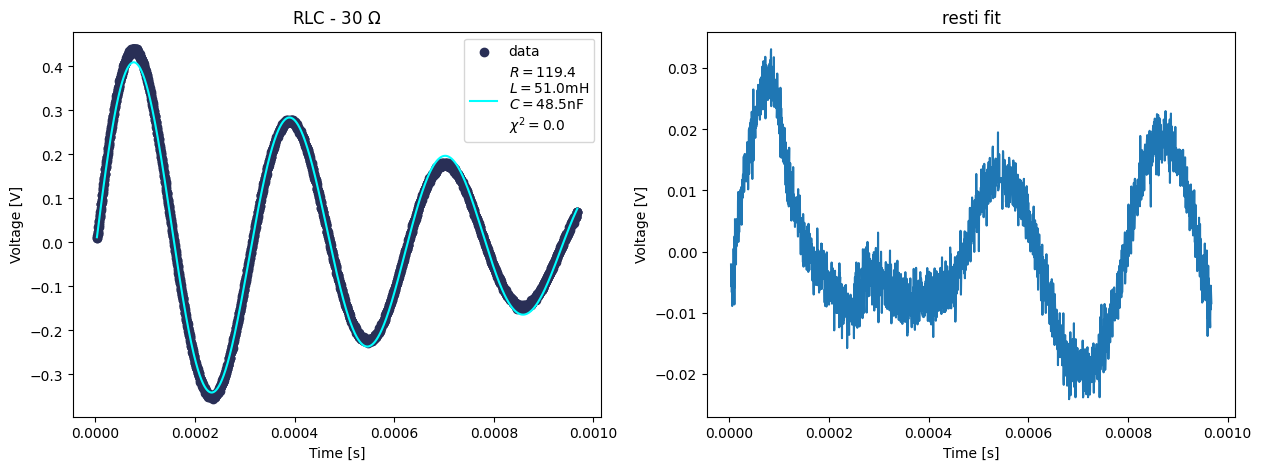

In [133]:
plt.subplots(1,2, figsize=(15,5))

plt.subplot(121)
plt.title('RLC - 30 $\Omega$')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.scatter(RLC_30_res[0][87:],RLC_30_res[1][87:], c='#292f56',label='data')
plt.plot(RLC_30_res[0][87:], V_sott(RLC_30_res[0][87:], m.values['R'], m.values['L'], m.values['C'], m.values['fase'], m.values['V_o']), c='cyan', label=f'$R = {round(m.values["R"],1)}$'+'\n'+f'$L = {round(m.values["L"]*1e3,1)}$'+'mH\n'+f'$C = {round(m.values["C"]*1e9,1)}$'+'nF\n'+f'$\chi^2 = {round(m.fval/m.ndof,1)}$')
plt.legend()

plt.subplot(122)
plt.title('resti fit')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [s]')
plt.plot(RLC_30_res[0][87:], RLC_30_res[1][87:] - V_sott(RLC_30_res[0][87:], m.values['R'], m.values['L'], m.values['C'], m.values['fase'], m.values['V_o']))

plt.savefig('imgs/RLC/RLC_30.pdf')

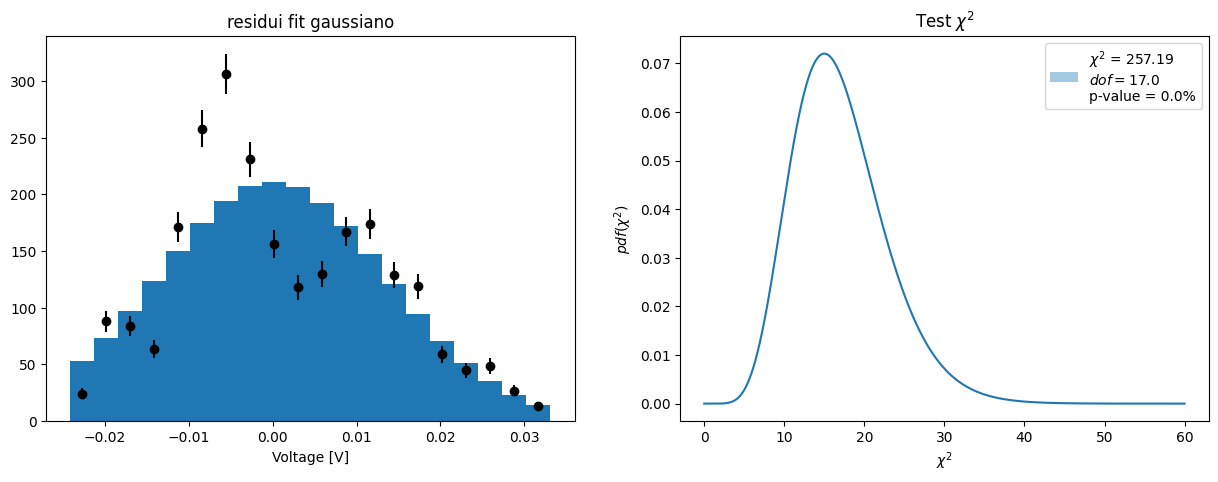

In [134]:
data = RLC_30_res[1][87:] - V_sott(RLC_30_res[0][87:], m.values['R'], m.values['L'], m.values['C'], m.values['fase'], m.values['V_o'])
a,b = np.histogram(data, bins=20)
c_ = ExtendedBinnedNLL(a, b, normal_scaled_cdf)
m_ = Minuit(c_, mu=0, sigma=1, scale = 1000)
m_.migrad()
m_.hesse()

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('residui fit gaussiano')
plt.xlabel('Voltage [V]')
m_.visualize()

plt.subplot(122)
chi_test(m_.fval, m_.ndof,60)

plt.savefig('imgs/RLC/RLC_30_res.pdf')

# R = 100 $\Omega$

87


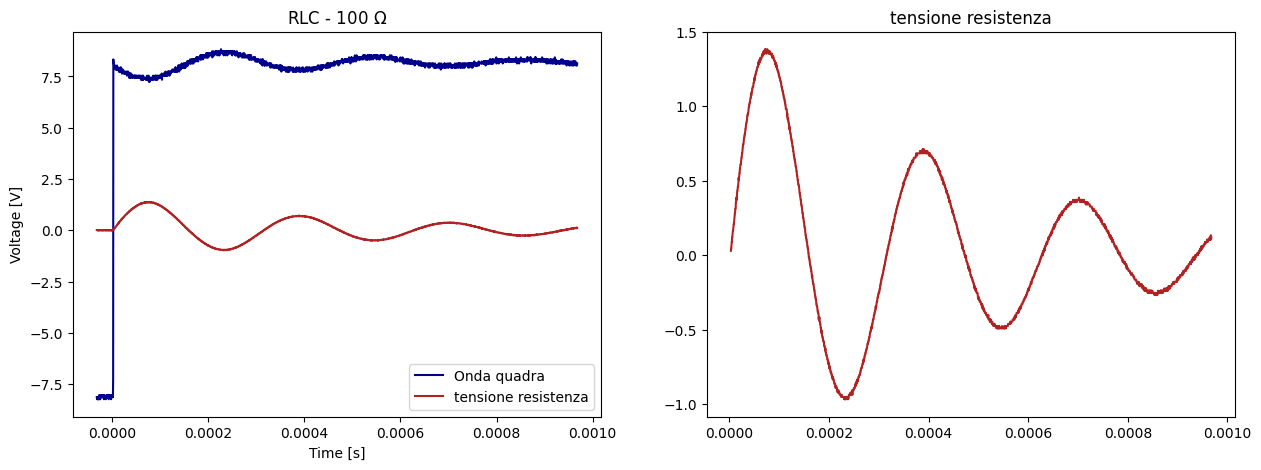

In [135]:
RLC_100_quadra, RLC_100_res, RLC_100_ind = get_data("data/RLC_100/")
if RLC_100_ind[1] == None:   RLC_100_ind = RLC_100_quadra[0], (RLC_100_quadra[1] - RLC_100_res[1])

cut = True

i = 0
if cut:
    v = RLC_100_quadra[1][0]
    while(v < np.max(RLC_100_quadra[1][:100])):
        v = RLC_100_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 100 $\Omega$')
plt.plot(RLC_100_quadra[0][:],RLC_100_quadra[1][:], c='darkblue')
plt.plot(RLC_100_res[0][:],  RLC_100_res[1][:],   c='firebrick')
# plt.plot(RLC_100_ind[0][:],  RLC_100_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_100_res[0][i:],  RLC_100_res[1][i:],   c='firebrick')

In [136]:
c = LeastSquares(RLC_100_res[0][87:], RLC_100_res[1][87:], 0.1, V_sott)
m = Minuit(c, R=100+R_g+R_L, L=L_int, C=C_int, fase=-0.0001, V_o=8)
# m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, True, True, False, False]
m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, False, False, False, False]
# m.limits['L', 'C'] = (51e-3, 54e-3), (48e-9, 51e-9)
m.migrad()
m.hesse()
chi.append(m.fval/m.ndof)
R.append(m.values['R'])
L.append(m.values['L'])
C.append(m.values['C'])
R_err.append(m.errors['R'])
L_err.append(m.errors['L'])
C_err.append(m.errors['C'])

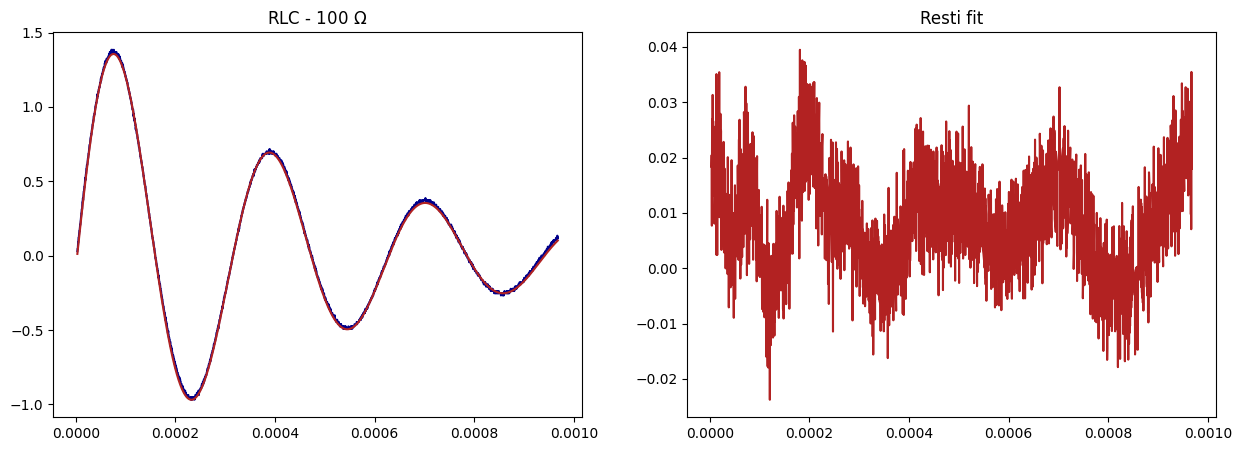

In [137]:
resti = [i-j for i,j in zip(RLC_100_res[1][87:], V_sott(RLC_100_res[0][87:], m.values['R'],m.values['L'], m.values['C'], m.values['fase'], m.values['V_o']))]
plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 100 $\Omega$')
plt.plot(RLC_100_res[0][87:],RLC_100_res[1][87:], c='darkblue')
plt.plot(RLC_100_res[0][87:],  V_sott(RLC_100_res[0][87:], m.values['R'],m.values['L'], m.values['C'],m.values['fase'], m.values['V_o']),   c='firebrick')

plt.subplot(122)
plt.title('Resti fit')
plt.plot(RLC_100_res[0][87:],  resti,   c='firebrick')


## R = 300 $\Omega$

87


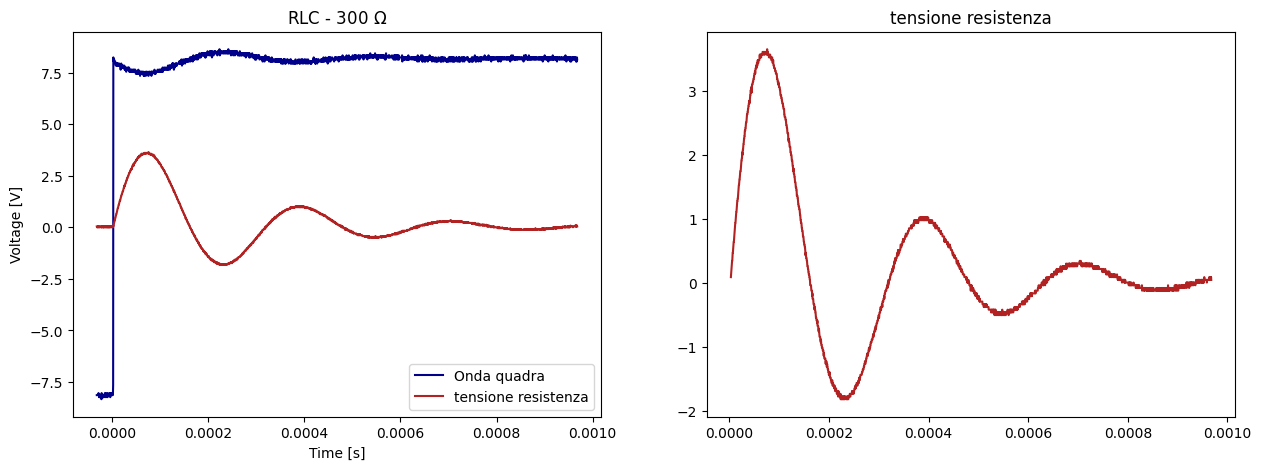

In [138]:
RLC_300_quadra, RLC_300_res, RLC_300_ind = get_data("data/RLC_300/")
if RLC_300_ind[1] == None:   RLC_300_ind = RLC_300_quadra[0], (RLC_300_quadra[1] - RLC_300_res[1])

cut = True

i = 0
if cut:
    v = RLC_300_quadra[1][0]
    while(v < np.max(RLC_300_quadra[1][:300])):
        v = RLC_300_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 300 $\Omega$')
plt.plot(RLC_300_quadra[0][:],RLC_300_quadra[1][:], c='darkblue')
plt.plot(RLC_300_res[0][:],  RLC_300_res[1][:],   c='firebrick')
# plt.plot(RLC_300_ind[0][:],  RLC_300_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_300_res[0][i:],  RLC_300_res[1][i:],   c='firebrick')

In [139]:
c = LeastSquares(RLC_300_res[0][87:], RLC_300_res[1][87:], 0.01, V_sott)
m = Minuit(c, R=300+R_g+R_L, L=L_int, C=C_int, fase=0, V_o=8)
# m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, True, True, False, False]
m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, False, False, False, False]
# m.limits['L', 'C'] = (51e-3, 54-3), (48e-9, 51e-9)
m.migrad()
m.hesse()
chi.append(m.fval/m.ndof)
R.append(m.values['R'])
L.append(m.values['L'])
C.append(m.values['C'])
R_err.append(m.errors['R'])
L_err.append(m.errors['L'])
C_err.append(m.errors['C'])

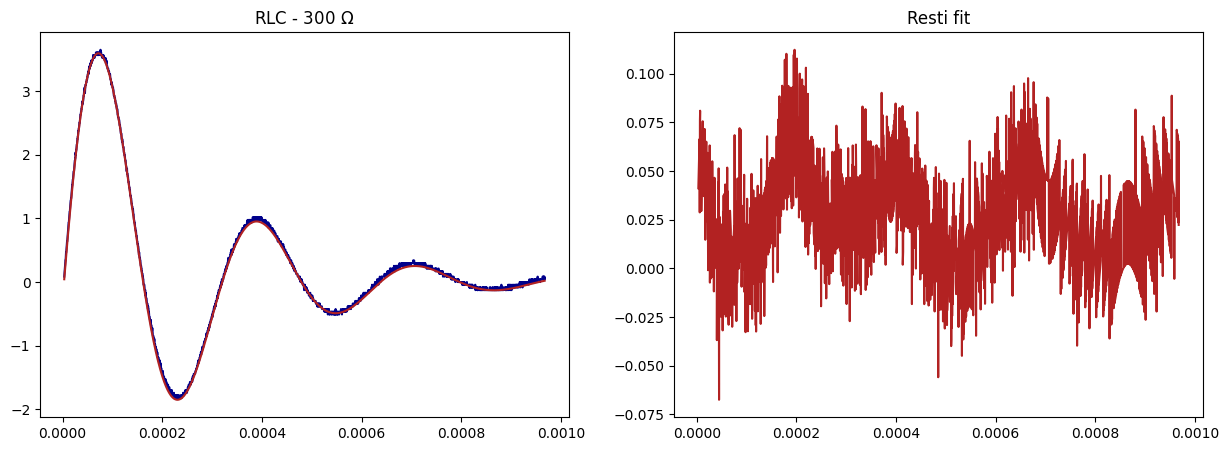

In [140]:
resti = [i-j for i,j in zip(RLC_300_res[1][87:], V_sott(RLC_300_res[0][87:], m.values['R'],m.values['L'], m.values['C'],m.values['fase'], m.values['V_o']))]
plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 300 $\Omega$')
plt.plot(RLC_300_res[0][87:],RLC_300_res[1][87:], c='darkblue')
plt.plot(RLC_300_res[0][87:],  V_sott(RLC_300_res[0][87:], m.values['R'],m.values['L'], m.values['C'],m.values['fase'], m.values['V_o']),   c='firebrick')

plt.subplot(122)
plt.title('Resti fit')
plt.plot(RLC_300_res[0][87:],  resti,   c='firebrick')

# R = 700 $\Omega$

87


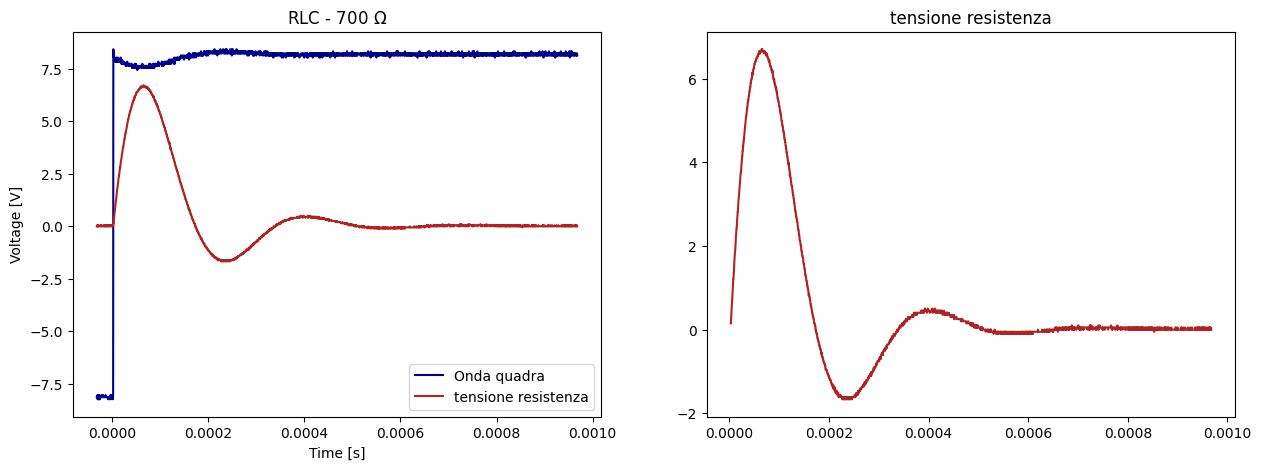

In [141]:
RLC_700_quadra, RLC_700_res, RLC_700_ind = get_data("data/RLC_700/")
if RLC_700_ind[1] == None:   RLC_700_ind = RLC_700_quadra[0], (RLC_700_quadra[1] - RLC_700_res[1])

cut = True

i = 0
if cut:
    v = RLC_700_quadra[1][0]
    while(v < np.max(RLC_700_quadra[1][:700])):
        v = RLC_700_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 700 $\Omega$')
plt.plot(RLC_700_quadra[0][:],RLC_700_quadra[1][:], c='darkblue')
plt.plot(RLC_700_res[0][:],  RLC_700_res[1][:],   c='firebrick')
# plt.plot(RLC_700_ind[0][:],  RLC_700_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_700_res[0][i:],  RLC_700_res[1][i:],   c='firebrick')

In [142]:
c = LeastSquares(RLC_700_res[0][87:], RLC_700_res[1][87:], 0.1, V_sott)
m = Minuit(c, R=700+R_g+R_L, L=L_int, C=C_int, fase=0, V_o=8)
# m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, True, True, False, False]
m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, False, False, False, False]
# m.limits['L', 'C'] = (51e-3, 54e-3), (48e-9, 51e-9)
m.migrad()
m.hesse()
chi.append(m.fval/m.ndof)
R.append(m.values['R'])
L.append(m.values['L'])
C.append(m.values['C'])
R_err.append(m.errors['R'])
L_err.append(m.errors['L'])
C_err.append(m.errors['C'])

In [143]:
Latex("$\Delta R = {:.2f} \Omega$  $\Delta L = {:.2f} mH \n\Delta C = {:.2f} nF$".format((m.values['R'] - (700+R_g+R_L)), (m.values['L'] - L_int)*1e3, (m.values['C'] - C_int)*1e9))

<IPython.core.display.Latex object>

# R = 1000 $\Omega$

87


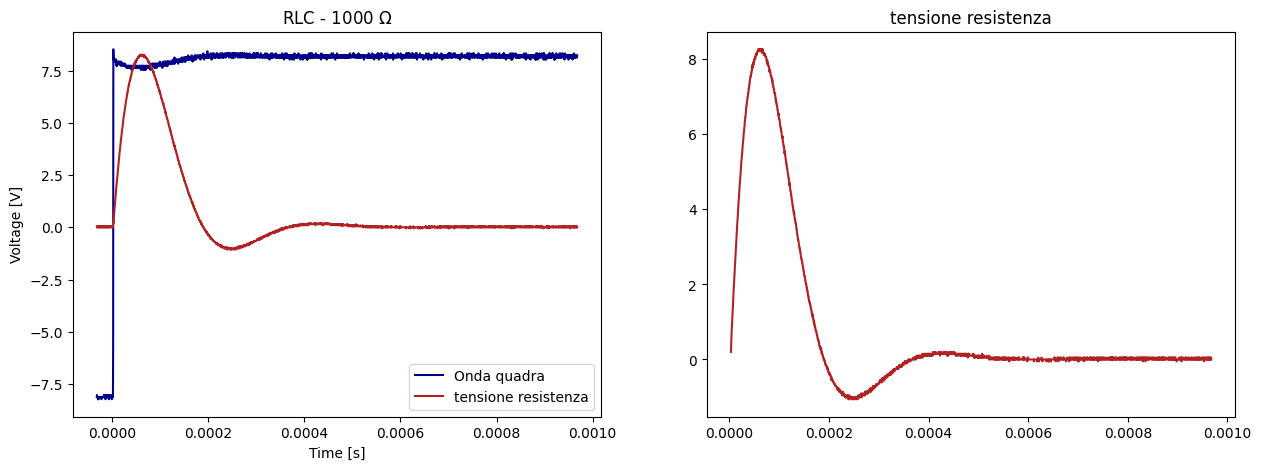

In [144]:
RLC_1000_quadra, RLC_1000_res, RLC_1000_ind = get_data("data/RLC_1000/")
if RLC_1000_ind[1] == None:   RLC_1000_ind = RLC_1000_quadra[0], (RLC_1000_quadra[1] - RLC_1000_res[1])

cut = True

i = 0
if cut:
    v = RLC_1000_quadra[1][0]
    while(v < np.max(RLC_1000_quadra[1][:1000])):
        v = RLC_1000_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1000 $\Omega$')
plt.plot(RLC_1000_quadra[0][:],RLC_1000_quadra[1][:], c='darkblue')
plt.plot(RLC_1000_res[0][:],  RLC_1000_res[1][:],   c='firebrick')
# plt.plot(RLC_1000_ind[0][:],  RLC_1000_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1000_res[0][i:],  RLC_1000_res[1][i:],   c='firebrick')

In [145]:
c = LeastSquares(RLC_1000_res[0][87:], RLC_1000_res[1][87:], 0.1, V_sott)
m = Minuit(c, R=1000+R_g+R_L, L=L_int, C=C_int, fase=0, V_o=8)
# m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, True, True, False, False]
m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, False, False, False, False]
# m.limits['L', 'C'] = (51e-3, 54e-3), (48e-9, 51e-9)
m.migrad()
m.hesse()
chi.append(m.fval/m.ndof)
R.append(m.values['R'])
L.append(m.values['L'])
C.append(m.values['C'])
R_err.append(m.errors['R'])
L_err.append(m.errors['L'])
C_err.append(m.errors['C'])

# R = 1400 $\Omega$

237


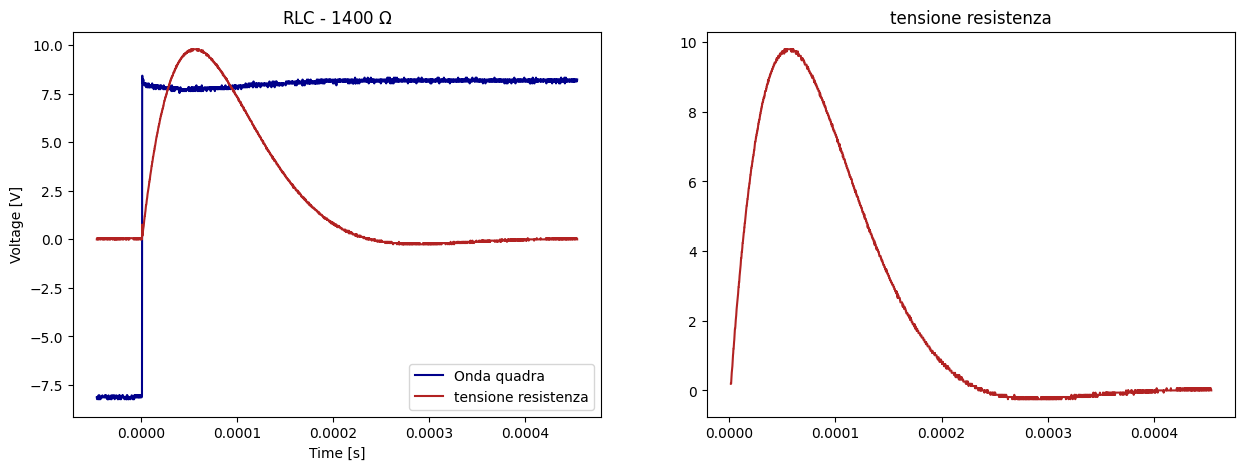

In [146]:
RLC_1400_quadra, RLC_1400_res, RLC_1400_ind = get_data("data/RLC_1400/")
if RLC_1400_ind[1] == None:   RLC_1400_ind = RLC_1400_quadra[0], (RLC_1400_quadra[1] - RLC_1400_res[1])

cut = True

i = 0
if cut:
    v = RLC_1400_quadra[1][0]
    while(v < np.max(RLC_1400_quadra[1][:1400])):
        v = RLC_1400_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1400 $\Omega$')
plt.plot(RLC_1400_quadra[0][:],RLC_1400_quadra[1][:], c='darkblue')
plt.plot(RLC_1400_res[0][:],  RLC_1400_res[1][:],   c='firebrick')
# plt.plot(RLC_1400_ind[0][:],  RLC_1400_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1400_res[0][i:],  RLC_1400_res[1][i:],   c='firebrick')

In [147]:
c = LeastSquares(RLC_1400_res[0][237:], RLC_1400_res[1][237:], 0.1, V_sott)
m = Minuit(c, R=1400+R_g+R_L, L=L_int, C=C_int, fase=0, V_o=8)
# m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, True, True, False, False]
m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, False, False, False, False]
# m.limits['L', 'C'] = (51e-3, 54e-3), (48e-9, 51e-9)
m.migrad()
m.hesse()
chi.append(m.fval/m.ndof)
R.append(m.values['R'])
L.append(m.values['L'])
C.append(m.values['C'])
R_err.append(m.errors['R'])
L_err.append(m.errors['L'])
C_err.append(m.errors['C'])

# R = 1500 $\Omega$

237


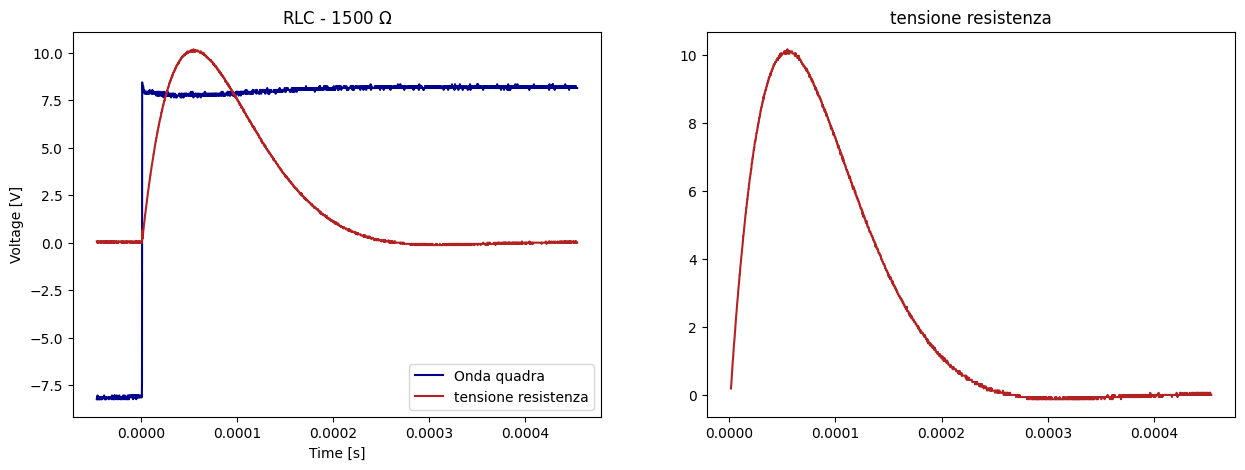

In [148]:
RLC_1500_quadra, RLC_1500_res, RLC_1500_ind = get_data("data/RLC_1500/")
if RLC_1500_ind[1] == None:   RLC_1500_ind = RLC_1500_quadra[0], (RLC_1500_quadra[1] - RLC_1500_res[1])

cut = True

i = 0
if cut:
    v = RLC_1500_quadra[1][0]
    while(v < np.max(RLC_1500_quadra[1][:1500])):
        v = RLC_1500_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1500 $\Omega$')
plt.plot(RLC_1500_quadra[0][:],RLC_1500_quadra[1][:], c='darkblue')
plt.plot(RLC_1500_res[0][:],  RLC_1500_res[1][:],   c='firebrick')
# plt.plot(RLC_1500_ind[0][:],  RLC_1500_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1500_res[0][i:],  RLC_1500_res[1][i:],   c='firebrick')

In [149]:
c = LeastSquares(RLC_1500_res[0][237:], RLC_1500_res[1][237:], 0.1, V_sott)
m = Minuit(c, R=1500+R_g+R_L, L=L_int, C=C_int, fase=0, V_o=8)
# m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, True, True, False, False]
m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, False, False, False, False]
# m.limits['L', 'C'] = (51e-3, 54e-3), (48e-9, 51e-9)
m.migrad()
m.hesse()
chi.append(m.fval/m.ndof)
R.append(m.values['R'])
L.append(m.values['L'])
C.append(m.values['C'])
R_err.append(m.errors['R'])
L_err.append(m.errors['L'])
C_err.append(m.errors['C'])

# R = 1540 $\Omega$

237


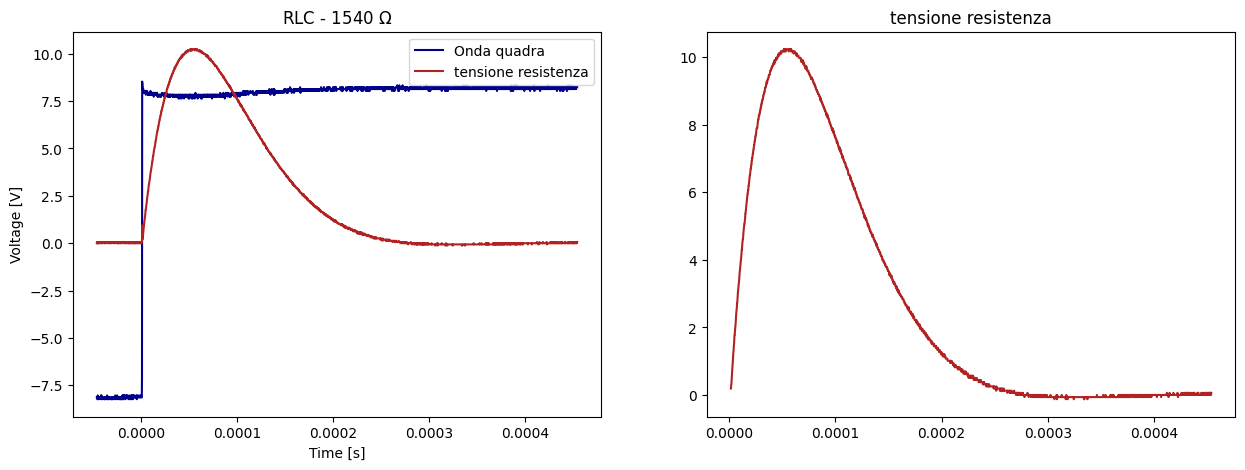

In [150]:
RLC_1540_quadra, RLC_1540_res, RLC_1540_ind = get_data("data/RLC_1540/")
if RLC_1540_ind[1] == None:   RLC_1540_ind = RLC_1540_quadra[0], (RLC_1540_quadra[1] - RLC_1540_res[1])

cut = True

i = 0
if cut:
    v = RLC_1540_quadra[1][0]
    while(v < np.max(RLC_1540_quadra[1][:1540])):
        v = RLC_1540_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1540 $\Omega$')
plt.plot(RLC_1540_quadra[0][:],RLC_1540_quadra[1][:], c='darkblue')
plt.plot(RLC_1540_res[0][:],  RLC_1540_res[1][:],   c='firebrick')
# plt.plot(RLC_1540_ind[0][:],  RLC_1540_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1540_res[0][i:],  RLC_1540_res[1][i:],   c='firebrick')

In [151]:
c = LeastSquares(RLC_1540_res[0][237:], RLC_1540_res[1][237:], 0.1, V_sott)
m = Minuit(c, R=1540+R_g+R_L, L=L_int, C=C_int, fase=0, V_o=8)
# m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, True, True, False, False]
m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, False, False, False, False]
# m.limits['L', 'C'] = (51e-3, 54e-3), (48e-9, 51e-9)
m.migrad()
m.hesse()
chi.append(m.fval/m.ndof)
R.append(m.values['R'])
L.append(m.values['L'])
C.append(m.values['C'])
R_err.append(m.errors['R'])
L_err.append(m.errors['L'])
C_err.append(m.errors['C'])

# R = 1570 $\Omega$

237


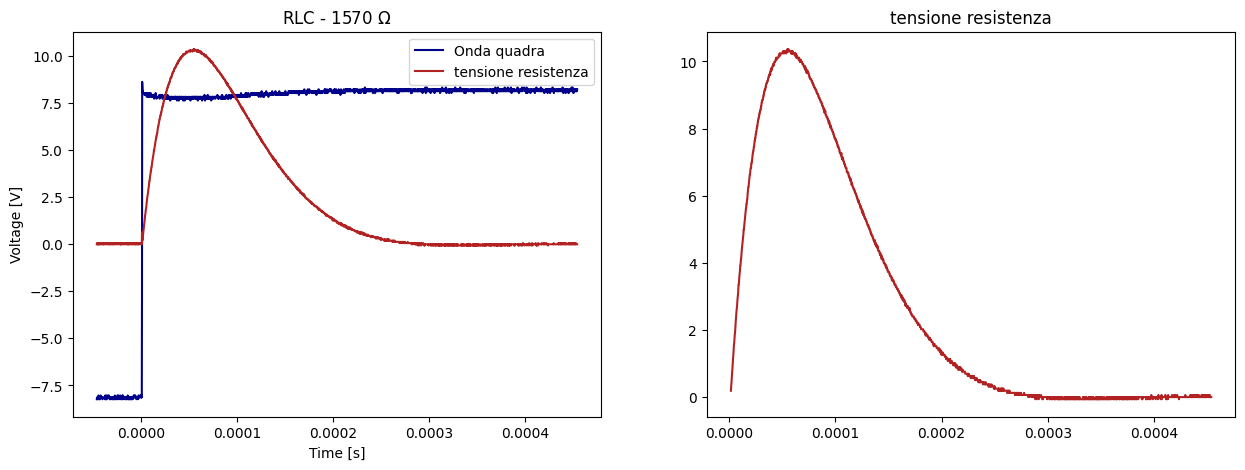

In [152]:
RLC_1570_quadra, RLC_1570_res, RLC_1570_ind = get_data("data/RLC_1570/")
if RLC_1570_ind[1] == None:   RLC_1570_ind = RLC_1570_quadra[0], (RLC_1570_quadra[1] - RLC_1570_res[1])

cut = True

i = 0
if cut:
    v = RLC_1570_quadra[1][0]
    while(v < np.max(RLC_1570_quadra[1][:1570])):
        v = RLC_1570_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1570 $\Omega$')
plt.plot(RLC_1570_quadra[0][:],RLC_1570_quadra[1][:], c='darkblue')
plt.plot(RLC_1570_res[0][:],  RLC_1570_res[1][:],   c='firebrick')
# plt.plot(RLC_1570_ind[0][:],  RLC_1570_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1570_res[0][i:],  RLC_1570_res[1][i:],   c='firebrick')

In [153]:
c = LeastSquares(RLC_1570_res[0][237:], RLC_1570_res[1][237:], 0.1, V_sott)
m = Minuit(c, R=1570+R_g+R_L, L=L_int, C=C_int, fase=0, V_o=8)
# m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, True, True, False, False]
m.fixed['R', 'L', 'C', 'fase', 'V_o'] = [True, False, False, False, False]
# m.limits['L', 'C'] = (51e-3, 54e-3), (48e-9, 51e-9)
m.migrad()
m.hesse()

chi.append(m.fval/m.ndof)
R.append(m.values['R'])
L.append(m.values['L'])
C.append(m.values['C'])
R_err.append(m.errors['R'])
L_err.append(m.errors['L'])
C_err.append(m.errors['C'])

# R = 2000 $\Omega$

67


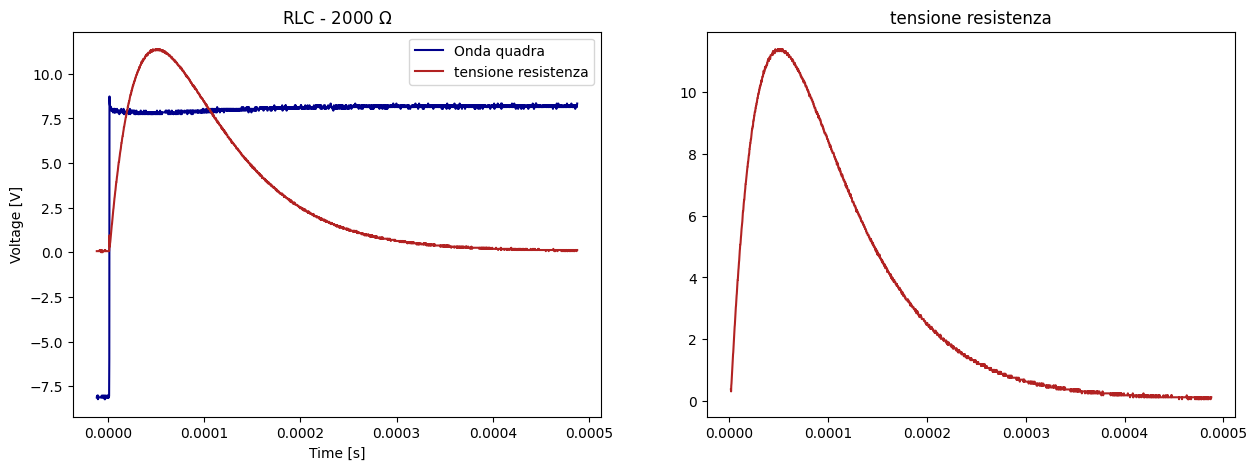

In [154]:
RLC_2000_quadra, RLC_2000_res, RLC_2000_ind = get_data("data/RLC_2000/")
if RLC_2000_ind[1] == None:   RLC_2000_ind = RLC_2000_quadra[0], (RLC_2000_quadra[1] - RLC_2000_res[1])

cut = True

i = 0
if cut:
    v = RLC_2000_quadra[1][0]
    while(v < np.max(RLC_2000_quadra[1][:2000])):
        v = RLC_2000_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 2000 $\Omega$')
plt.plot(RLC_2000_quadra[0][:],RLC_2000_quadra[1][:], c='darkblue')
plt.plot(RLC_2000_res[0][:],  RLC_2000_res[1][:],   c='firebrick')
# plt.plot(RLC_2000_ind[0][:],  RLC_2000_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_2000_res[0][i:],  RLC_2000_res[1][i:],   c='firebrick')

In [155]:
def V_crit(t, R, L, C, offset, offset2, V_o):
    '''tensione resistenza in regime criticamente smorzato'''
    gamma = R/(2*L)
    
    return V_o * C* R * (gamma**2) * (t+offset) * np.exp(-gamma*(t + offset)) + offset2

In [156]:
c = LeastSquares(RLC_2000_res[0][67:], RLC_2000_res[1][67:], 0.05, V_crit)
m = Minuit(c, R=2000+R_g+R_L, L=L_int, offset=0, offset2=0, V_o=10, C=C_int)
m.fixed['R', 'L', 'offset', 'V_o', 'C'] = [True, False, False, False, False]
m.simplex()
m.migrad()
m.minos()
m.hesse()

C:\Users\Yehan\AppData\Local\Temp\ipykernel_12032\3811771953.py:5: RuntimeWarning: overflow encountered in exp
  return V_o * C* R * (gamma**2) * (t+offset) * np.exp(-gamma*(t + offset)) + offset2


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2800 (χ²/ndof = 1.2)       │             Nfcn = 2647              │
│ EDM = 0.000198 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R       │  2.089e3  │  0.021e3  │            │            │         │         │  yes  │
│ 1 │ L       │ 52.472e-3 │ 0.019e-3  │ -0.020e-3  │  0.019e-3  │         │         │       │
│ 2 │ C       │ 65.06e-9  │  0.18e-9  │  -0.18e-9  │  0.18e-9   │         │         │       │
│ 3 │ offset  │ -1.210e-6 │ 0.014e-6  │ -0.014e-6  │  0.014e-6  │         │         │       │
│ 4 │ offset2 │  0.1486   │  0.0016   │  -0.0016   │   0.0017   │         │         │       │
│ 5 │ V_o     │  11.209   │   0.031   │   -0.031   │   0.031    │         │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           L           │           C           │        offset         │        offset2        │          V_o          │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │ -0.020e-3 │ 0.019e-3  │ -0.18e-9  │  0.18e-9  │ -0.014e-6 │ 0.014e-6  │  -0.0016  │  0.0017   │  -0.031   │   0.031   │
│  Valid   │   True    │   True    │   False   │   False   │   True    │   True    │   True    │   True    │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────┐
│         │                R                L                C           offset          offset2              V_o │
├─────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────┤
│       R │                0                0                0                0                0             0e-3 │
│       L │                0         3.69e-10      192.754e-18       179.78e-15         -18.3e-9          33.2e-9 │
│       C │                0      192.754e-18         3.32e-20        0.094e-18   -17.002297e-15 -5.654482622e-12 │
│  offset │                0       179.78e-15        0.094e-18         1.99e-16     -8.85184e-12     16.11570e-12 │
│ offset2 │                0         -18.3e-9   -17.002297e-15     -8.85184e-12         2.65e-06          -2.9e-6 │
│     V_o │            

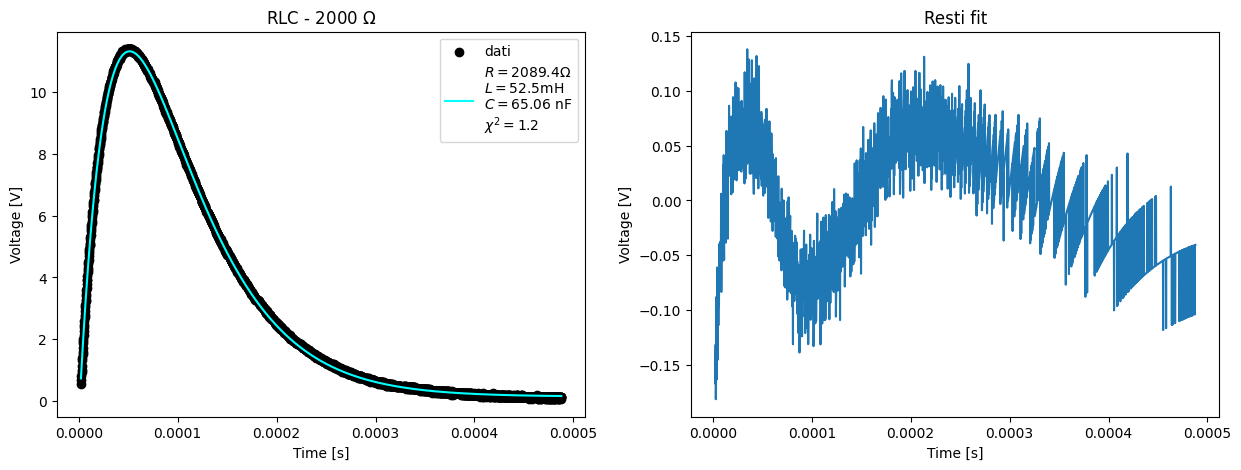

In [157]:
N = 70
plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 2000 $\Omega$')
plt.scatter(RLC_2000_res[0][N:],RLC_2000_res[1][N:], c='k')
plt.plot(RLC_2000_res[0][N:],  V_crit(RLC_2000_res[0][N:], m.values['R'],m.values['L'],m.values['C'],m.values['offset'], m.values['offset2'], m.values['V_o']),   c='cyan')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['dati',f'$R = {round(m.values["R"],1)} \Omega$'+'\n'+f'$L = {round(m.values["L"]*1e3,1)}$'+'mH\n'+f'$C = {round(m.values["C"]*1e9, 2)}$ nF'+'\n'+f'$\chi^2 = {round(m.fval/m.ndof,1)}$'])

plt.subplot(122)
plt.title('Resti fit')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.plot(RLC_2000_res[0][N:],  RLC_2000_res[1][N:] - V_crit(RLC_2000_res[0][N:], m.values['R'],m.values['L'], m.values['C'],m.values['offset'], m.values['offset2'], m.values['V_o']))

plt.savefig('imgs/RLC/RLC_2000.pdf')

In [158]:
# y = V_crit(RLC_2000_res[0][N:], 1970+R_g+R_L,m.values['L'],m.values['offset'], m.values['Q_o'])
# k = V_crit(RLC_2000_res[0][N:], 2000+R_g+R_L,m.values['L'],m.values['offset'], m.values['Q_o']) - y
# plt.plot(RLC_2000_res[0][N:], k, c='red', label='$R_{griglia}$ : 2000$\Omega$ \n $R_{teorico}$: 1970 $\Omega$' )
# plt.xlabel('Time [s]')
# plt.ylabel('Voltage [V]')
# plt.title('Differenza tra $R_{griglia}$ e $R_{teorico}$')
# plt.legend()

# plt.savefig('imgs/RLC/RLC_2000_correzione.pdf')

# R = 3000 $\Omega$

67


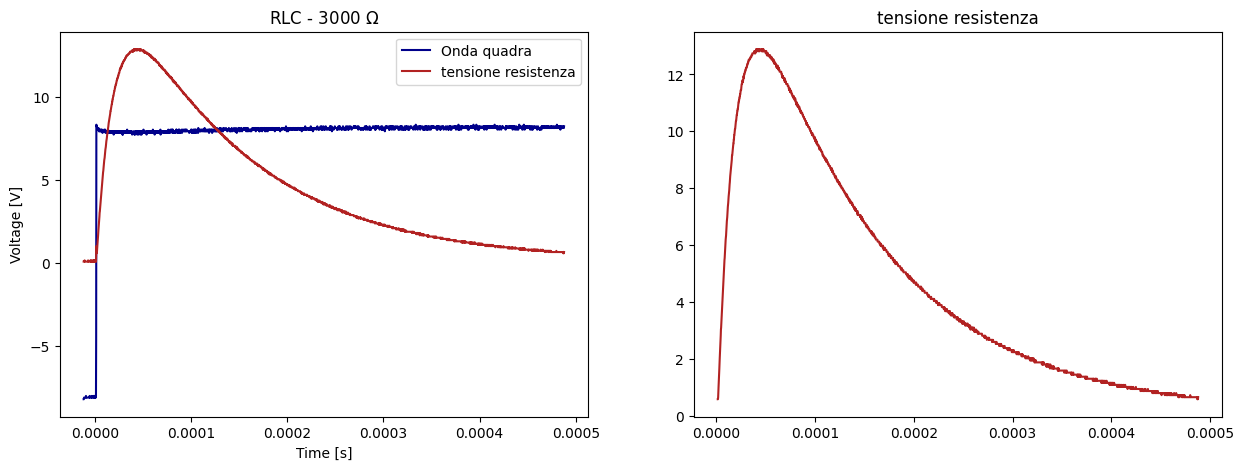

In [159]:
RLC_3000_quadra, RLC_3000_res, RLC_3000_ind = get_data("data/RLC_3000/")
if RLC_3000_ind[1] == None:   RLC_3000_ind = RLC_3000_quadra[0], (RLC_3000_quadra[1] - RLC_3000_res[1])

cut = True

i = 0
if cut:
    v = RLC_3000_quadra[1][0]
    while(v < np.max(RLC_3000_quadra[1][:3000])):
        v = RLC_3000_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 3000 $\Omega$')
plt.plot(RLC_3000_quadra[0][:],RLC_3000_quadra[1][:], c='darkblue')
plt.plot(RLC_3000_res[0][:],  RLC_3000_res[1][:],   c='firebrick')
# plt.plot(RLC_3000_ind[0][:],  RLC_3000_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_3000_res[0][i:],  RLC_3000_res[1][i:],   c='firebrick')

In [160]:
def V_sovr(t, R, L, C, V_o, phi):
    '''tensione resistenza in regime sovrasmorzato'''
    gamma = R/(2*L)
    omega = 1/np.sqrt(float(L*C))
    betha = np.sqrt(np.power(gamma,2) - np.power(omega,2))
    
    return V_o*C*R*(omega**2)*(np.exp(-(t-phi)*(gamma-betha)) - np.exp(-(t-phi)*(gamma+betha)))/(2*betha)

In [161]:
N = 80
c = LeastSquares(RLC_3000_res[0][N:], RLC_3000_res[1][N:], 0.03, V_sovr)
m = Minuit(c, R=3000+R_g+R_L, L=L_int, C=C_int, V_o=10, phi=0.)
m.limits['R', 'L', 'C'] = (0, np.inf)
m.fixed['R', 'L', 'C', 'V_o'] = [True, False, False, False]
m.simplex()
m.migrad()
m.minos()
m.hesse()

# plt.subplots(1,2, figsize=(15,5))
# plt.subplot(121)
# plt.title('RLC - 3000 $\Omega$')
# plt.scatter(RLC_3000_res[0][N:],RLC_3000_res[1][N:], c='k')
# plt.plot(RLC_3000_res[0][N:],  V_sovr(RLC_3000_res[0][N:], m.values['R'],m.values['L'],m.values['C'], m.values['V_o'], m.values['phi']),   c='cyan')
# plt.xlabel('Time [s]')
# plt.ylabel('Voltage [V]')
# plt.legend(['dati',f'$R = {round(m.values["R"],1)} \Omega$'+'\n'+f'$L = {round(m.values["L"]*1e3,1)}$'+'mH\n'+f'$C = {round(m.values["C"]*1e9,1)}$'+'nF\n'+f'$\chi^2 = {round(m.fval/m.ndof,1)}$'])

# plt.subplot(122)
# plt.title('Resti fit')
# plt.xlabel('Time [s]')
# plt.ylabel('Voltage [V]')
# plt.plot(RLC_3000_res[0][N:],  RLC_3000_res[1][N:] - V_sovr(RLC_3000_res[0][N:], m.values['R'],m.values['L'],m.values['C'], m.values['V_o'],m.values['phi']))
# plt.savefig('imgs/RLC/RLC_3000.pdf')

C:\Users\Yehan\AppData\Local\Temp\ipykernel_12032\2017132441.py:7: RuntimeWarning: overflow encountered in exp
  return V_o*C*R*(omega**2)*(np.exp(-(t-phi)*(gamma-betha)) - np.exp(-(t-phi)*(gamma+betha)))/(2*betha)
C:\Users\Yehan\AppData\Local\Temp\ipykernel_12032\2017132441.py:7: RuntimeWarning: invalid value encountered in subtract
  return V_o*C*R*(omega**2)*(np.exp(-(t-phi)*(gamma-betha)) - np.exp(-(t-phi)*(gamma+betha)))/(2*betha)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3002 (χ²/ndof = 1.2)       │              Nfcn = 284              │
│ EDM = 7.14e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │  3.089e3  │  0.031e3  │            │            │    0    │         │  yes  │
│ 1 │ L    │ 49.35e-3  │  0.04e-3  │  -0.04e-3  │  0.04e-3   │    0    │         │       │
│ 2 │ C    │ 50.193e-9 │ 0.010e-9  │ -0.010e-9  │  0.010e-9  │    0    │         │       │
│ 3 │ V_o  │  15.4414  │  0.0022   │  -0.0022   │   0.0022   │         │         │       │
│ 4 │ phi  │ 1.432e-6  │ 0.010e-6  │ -0.010e-6  │  0.010e-6  │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           L           │           C           │          V_o          │          phi          │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │ -0.04e-3  │  0.04e-3  │ -0.01e-9  │  0.01e-9  │  -0.0022  │  0.0022   │  -10e-9   │   10e-9   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────┬──────────────────────────────────────────────────────────────────────────────────────┐
│     │                R                L                C              V_o              phi │
├─────┼──────────────────────────────────────────────────────────────────────────────────────┤
│   R │                0                0                0             0e-6                0 │
│   L │                0         1.39e-09   -111.14871e-18          17.3e-9      -277.11e-15 │
│   C │                0   -111.14871e-18         1.07e-22 -16.33736169e-15         0.98e-21 │
│ V_o │             0e-6          17.3e-9 -16.33736169e-15         4.81e-06      -305.29e-15 │
│ phi │                0      -277.11e-15         0.98e-21      -305.29e-15         9.34e-17 │
└─────┴──────────────────────────────────────────────────────────────────────────────────────┘

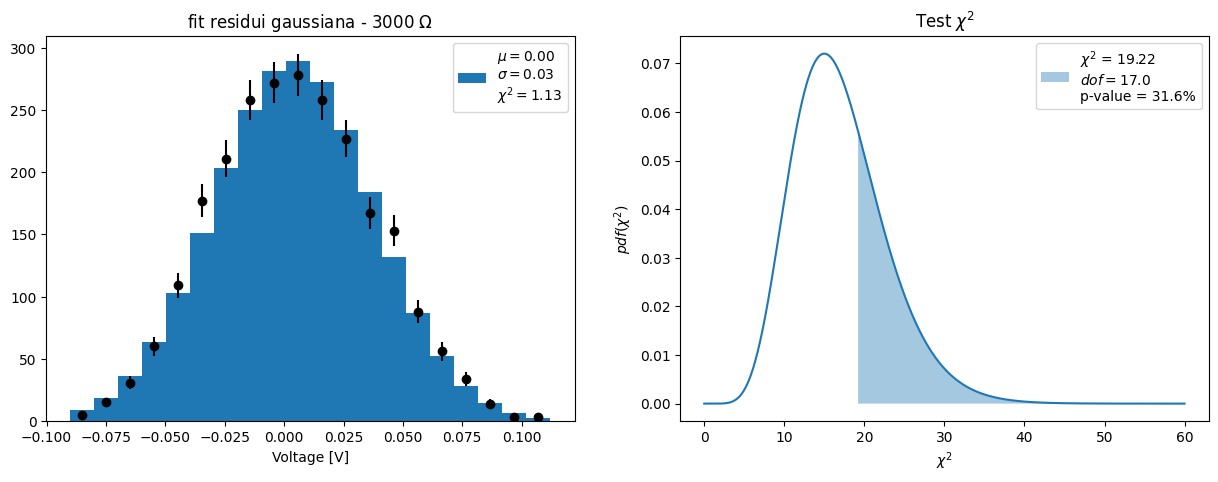

In [162]:
plt.subplots(1,2, figsize=(15,5))

plt.subplot(121)
plt.title('fit residui gaussiana - 3000 $\Omega$')
plt.xlabel('Voltage [V]')
a,b = np.histogram(RLC_3000_res[1][N:] - V_sovr(RLC_3000_res[0][N:], m.values['R'],m.values['L'],m.values['C'], m.values['V_o'],m.values['phi']), bins=20)
c_ = ExtendedBinnedNLL(a, b, normal_scaled_cdf)
m_ = Minuit(c_, mu=0, sigma=1, scale = 1000)
m_.migrad()
m_.hesse()
m_.visualize()
plt.legend(['$\mu = {:.2f}$'.format(m_.values['mu'])+'\n''$\sigma = {:.2f}$'.format(m_.values['sigma'])+'\n' '$\chi^2 = {:.2f}$'.format(m_.fval/m_.ndof)])

plt.subplot(122)
chi_test(m_.fval, m_.ndof, 60)

plt.savefig('imgs/RLC/RLC_3000_res.pdf')

# All

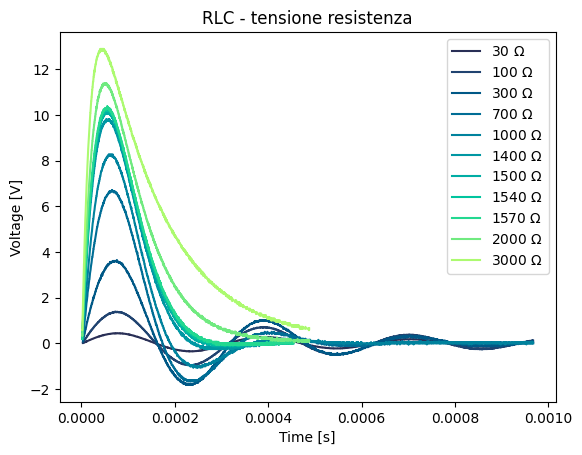

In [163]:
plt.plot(RLC_30_res[0][87:], RLC_30_res[1][87:], c='#292f56', label='30 $\Omega$')
plt.plot(RLC_100_res[0][87:], RLC_100_res[1][87:], c='#204370', label='100 $\Omega$')
plt.plot(RLC_300_res[0][87:], RLC_300_res[1][87:], c='#005886', label='300 $\Omega$')
plt.plot(RLC_700_res[0][87:], RLC_700_res[1][87:], c='#006d95', label='700 $\Omega$')
plt.plot(RLC_1000_res[0][87:], RLC_1000_res[1][87:], c='#00829d', label='1000 $\Omega$')
plt.plot(RLC_1400_res[0][237:], RLC_1400_res[1][237:], c='#0097a3', label='1400 $\Omega$')
plt.plot(RLC_1500_res[0][237:], RLC_1500_res[1][237:], c='#00ada4', label='1500 $\Omega$')
plt.plot(RLC_1540_res[0][237:], RLC_1540_res[1][237:], c='#00c49e', label='1540 $\Omega$')
plt.plot(RLC_1570_res[0][237:], RLC_1570_res[1][237:], c='#23d890', label='1570 $\Omega$')
plt.plot(RLC_2000_res[0][67:], RLC_2000_res[1][67:], c='#70ea80', label='2000 $\Omega$')
plt.plot(RLC_3000_res[0][67:], RLC_3000_res[1][67:], c='#acfa70', label='3000 $\Omega$')
plt.title('RLC - tensione resistenza')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.savefig('imgs/RLC/RLC_all.pdf',bbox_inches='tight')

5.531788542030907e-08 2.0532400136437198e-11
0.04700114869923004 1.5893465511603157e-05


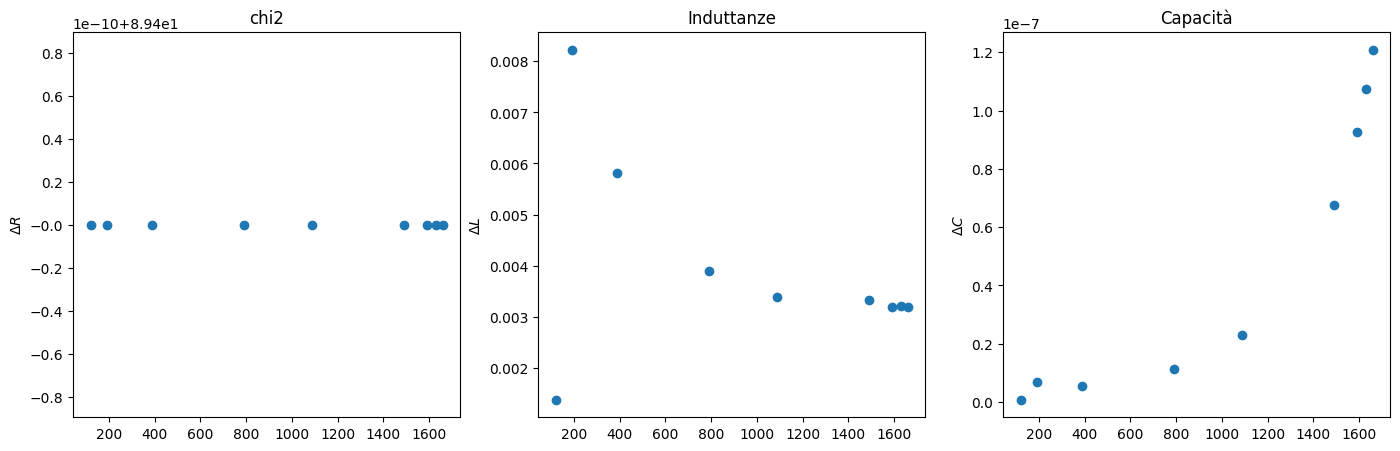

In [164]:
Rs,Ls,Cs = np.array([30,100,300,700,1000,1400,1500,1540,1570]), np.array([L_int,L_int,L_int,L_int,L_int,L_int,L_int,L_int,L_int]), np.array([C_int,C_int,C_int,C_int,C_int,C_int,C_int,C_int,C_int])

R_ = np.array(R)
L_ = np.array(L)
C_ = np.array(C)

plt.subplots(1,3,figsize=(17,5))

plt.subplot(131)
plt.title('chi2')
plt.ylabel('$\Delta R$')
plt.scatter(R_,np.abs(Rs-R))

plt.subplot(132)
plt.title('Induttanze')
plt.ylabel('$\Delta L$')
plt.scatter(R_,np.abs(Ls-L_))

plt.subplot(133)
plt.title('Capacità')
plt.ylabel('$\Delta C$')
plt.scatter(R_,np.abs(Cs-C_))

C_media, C_media_err = media_pesata(C, C_err)
L_media, L_media_err = media_pesata(L, L_err)
print(C_media, C_media_err)
print(L_media, L_media_err)

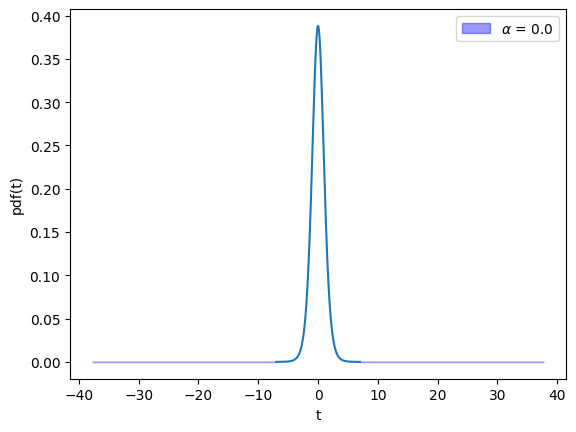

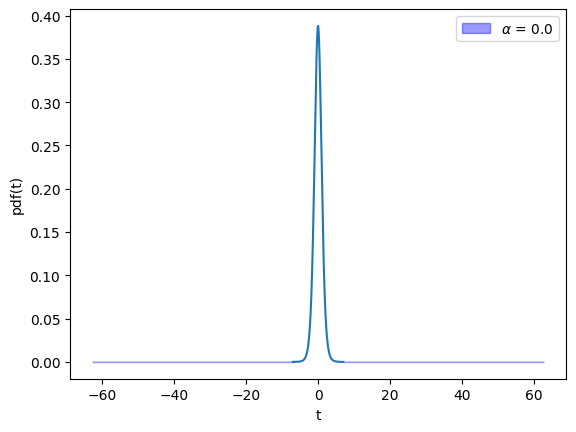

In [182]:
t = np.abs(50.193e-9 - C_int)/np.sqrt((0.01e-9)**2 + C_int_err**2)
t_test(t, 9)
plt.show()
t = np.abs(49.35e-3 - L_int)/np.sqrt((0.04e-3)**2 + L_int_err**2)
t_test(t, 9)
plt.show()

In [165]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

In [166]:
def exp(x, a, b, c):
    return a*np.exp(b*x) + c

In [167]:
# func = parabola

# plt.subplots(1,3,figsize=(17,5))
# plt.subplot(131)
# plt.title('Errore fit Resistenze')
# plt.ylabel('$\Delta R$')
# plt.xlabel('R [$\Omega$]')
# c = LeastSquares(R, np.abs(Rs-R), R_err, func)
# m = Minuit(c, a=1, b=1, c=1)
# m.migrad()
# m.visualize()
# plt.legend(['fit parabolico','$\Delta R = |R_{int} - R_{teorico}|$'])

# plt.subplot(132)
# plt.title('Errore fit Induttanze')
# plt.ylabel('$\Delta L$')
# plt.xlabel('R [$\Omega$]')
# c = LeastSquares(R, np.abs(Ls-L), L_err, func)
# m = Minuit(c, a=1, b=1, c=1)
# m.migrad()
# m.visualize()
# plt.legend(['fit parabolico','$\Delta L = |L_{int} - L_{teorico}|$'])

# plt.subplot(133)
# plt.title('Errore fit Capacità')
# plt.ylabel('$\Delta C$')
# plt.xlabel('R [$\Omega$]')
# c = LeastSquares(R, np.abs(Cs-C), C_err, func)
# m = Minuit(c, a=1, b=1, c=1)
# m.migrad()
# m.visualize()
# plt.legend(['fit parabolico','$\Delta C = |C_{int} - C_{teorico}|$'])

# plt.savefig('imgs/RLC/RLC_sottosmorzato.pdf',bbox_inches='tight')


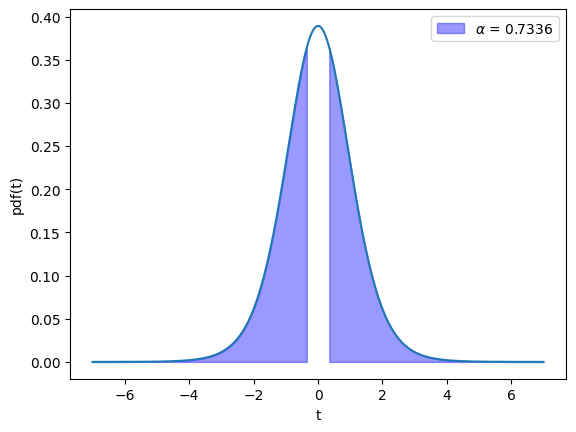

In [181]:
# t = (49.35e-9 - 49e-9)/np.sqrt((0.02e-9)**2 + (1e-9)**2)
# t_test(t, 10)
# plt.savefig('imgs/RC/C_t_test.pdf')